# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Application Train DataSet

In [2]:
train_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\Final project_Moonlight\application_train.csv")
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_data.shape

(307511, 122)

# Selected Features

In [4]:
columns = ["SK_ID_CURR","NAME_CONTRACT_TYPE","CNT_CHILDREN","FLAG_OWN_REALTY","AMT_INCOME_TOTAL","AMT_CREDIT","NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED",
"FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","ORGANIZATION_TYPE",
"APARTMENTS_AVG","BASEMENTAREA_AVG","ELEVATORS_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
"NONLIVINGAPARTMENTS_AVG","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_10","FLAG_DOCUMENT_15","AMT_REQ_CREDIT_BUREAU_YEAR",]
len(columns)

32

# Create a dataFrame with selected columns

In [5]:
application_dataFrame = pd.DataFrame(train_data[columns])
application_dataFrame["TARGET"] = train_data["TARGET"]
application_dataFrame

,SK_ID_CURR,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,0,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0202,0.0000,2.0,-1134.0,0,0,0,0,1.0,1
1,100003,Cash loans,0,N,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,...,0.0773,0.0039,1.0,-828.0,0,0,0,0,0.0,0
2,100004,Revolving loans,0,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,NaN,NaN,0.0,-815.0,0,0,0,0,0.0,0
3,100006,Cash loans,0,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,...,NaN,NaN,2.0,-617.0,0,0,0,0,NaN,0
4,100007,Cash loans,0,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,NaN,NaN,0.0,-1106.0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,0,N,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,...,0.1484,0.0753,0.0,-273.0,0,0,0,0,NaN,0
307507,456252,Cash loans,0,Y,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0.0202,0.0000,0.0,0.0,0,0,0,0,NaN,0
307508,456253,Cash loans,0,Y,153000.0,677664.0,Working,Higher education,Separated,House / apartment,...,0.0841,0.0000,6.0,-1909.0,0,0,0,0,1.0,0
307509,456254,Cash loans,0,Y,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,NaN,NaN,0.0,-322.0,0,0,0,0,0.0,1


In [6]:
application_dataFrame.shape

(307511, 33)

# Bureau Data

In [7]:
bureau_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\Final project_Moonlight\bureau.csv")
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
bureau_data.shape

(1716428, 17)

# Bureau selected Features

In [9]:
bureau_columnus = ["SK_ID_CURR","SK_ID_BUREAU","CREDIT_ACTIVE","DAYS_CREDIT","AMT_CREDIT_MAX_OVERDUE","AMT_CREDIT_SUM","CREDIT_TYPE"]
len(bureau_columnus)

7

# Create a dataFrame with Bureau selected columns

In [10]:
bureau_dataFrame = pd.DataFrame(bureau_data[bureau_columnus])
bureau_dataFrame.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,CREDIT_TYPE
0,215354,5714462,Closed,-497,NaN,91323.0,Consumer credit
1,215354,5714463,Active,-208,NaN,225000.0,Credit card
2,215354,5714464,Active,-203,NaN,464323.5,Consumer credit
3,215354,5714465,Active,-203,NaN,90000.0,Credit card
4,215354,5714466,Active,-629,77674.5,2700000.0,Consumer credit


In [11]:
bureau_dataFrame.shape

(1716428, 7)

# Aggregating the data

In [12]:
agg_dict = {'SK_ID_BUREAU':'mean',
            'CREDIT_ACTIVE':pd.Series.mode,
            'DAYS_CREDIT':"mean",
            'AMT_CREDIT_MAX_OVERDUE':'mean',
            'AMT_CREDIT_SUM' : 'mean',
            'CREDIT_TYPE': pd.Series.mode
           }

# Perfrom Groupby with SK_ID_CURR 

In [13]:
groupby_data = bureau_dataFrame.groupby(["SK_ID_CURR"]).agg(agg_dict)

In [14]:
groupby_data["CREDIT_ACTIVE"] = groupby_data["CREDIT_ACTIVE"].apply(lambda x: x[0] if type(x) is np.ndarray else x)
groupby_data["CREDIT_TYPE"] = groupby_data["CREDIT_TYPE"].apply(lambda x: x[0] if type(x) is np.ndarray else x)

In [15]:
groupby_data.reset_index(level=0, inplace=True)

In [16]:
groupby_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,CREDIT_TYPE
0,100001,5896633.000,Closed,-735.000000,NaN,207623.571429,Consumer credit
1,100002,6153272.125,Closed,-874.000000,1681.029,108131.945625,Consumer credit
2,100003,5885878.500,Closed,-1400.750000,0.000,254350.125000,Consumer credit
3,100004,6829133.500,Closed,-867.000000,0.000,94518.900000,Consumer credit
4,100005,6735201.000,Active,-190.666667,0.000,219042.000000,Consumer credit


In [17]:
groupby_data.shape

(305811, 7)

# Join groupby_data and application_dataFrame

In [18]:
join_data = pd.merge(application_dataFrame, groupby_data, on='SK_ID_CURR', how='left')
join_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,CREDIT_TYPE
0,100002,Cash loans,0,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,1.0,1,6153272.125,Closed,-874.00,1681.029,108131.945625,Consumer credit
1,100003,Cash loans,0,N,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,...,0,0,0.0,0,5885878.500,Closed,-1400.75,0.000,254350.125000,Consumer credit
2,100004,Revolving loans,0,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0.0,0,6829133.500,Closed,-867.00,0.000,94518.900000,Consumer credit
3,100006,Cash loans,0,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,0,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0.0,0,5987200.000,Closed,-1149.00,0.000,146250.000000,Consumer credit


In [19]:
join_data.shape

(307511, 39)

In [20]:
join_data = join_data.drop(["SK_ID_CURR"],axis=1)

# Descriptive Statistics

In [21]:
join_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,APARTMENTS_AVG,...,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,SK_ID_BUREAU,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,151450.00000,...,307511.000000,307511.000000,307511.000000,307511.00000,265992.000000,307511.000000,2.634910e+05,263491.000000,1.838860e+05,2.634900e+05
mean,0.417052,1.687979e+05,5.990260e+05,0.020868,-16036.995067,63815.045904,0.056720,0.015144,0.050769,0.11744,...,0.000042,0.015115,0.000023,0.00121,1.899974,0.080729,5.890848e+06,-1083.047110,5.242425e+03,3.780802e+05
std,0.722121,2.371231e+05,4.024908e+05,0.013831,4363.988632,141275.766519,0.231307,0.122126,0.219526,0.10824,...,0.006502,0.122010,0.004771,0.03476,1.869295,0.272419,5.321748e+05,563.327298,3.064082e+05,8.916731e+05
min,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000002e+06,-2922.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,0.000000,0.000000,0.000000,0.05770,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.424165e+06,-1434.000000,0.000000e+00,1.035000e+05
50%,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1213.000000,0.000000,0.000000,0.000000,0.08760,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,5.854116e+06,-1050.571429,0.000000e+00,1.955072e+05
75%,1.000000,2.025000e+05,8.086500e+05,0.028663,-12413.000000,-289.000000,0.000000,0.000000,0.000000,0.14850,...,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,6.361091e+06,-663.763889,2.124000e+03,3.941162e+05
max,19.000000,1.170000e+08,4.050000e+06,0.072508,-7489.000000,365243.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.00000,25.000000,1.000000,6.843454e+06,0.000000,1.159872e+08,1.980723e+08


# Display the Complete Meta-Data of the dataset

In [22]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NAME_CONTRACT_TYPE          307511 non-null  object 
 1   CNT_CHILDREN                307511 non-null  int64  
 2   FLAG_OWN_REALTY             307511 non-null  object 
 3   AMT_INCOME_TOTAL            307511 non-null  float64
 4   AMT_CREDIT                  307511 non-null  float64
 5   NAME_INCOME_TYPE            307511 non-null  object 
 6   NAME_EDUCATION_TYPE         307511 non-null  object 
 7   NAME_FAMILY_STATUS          307511 non-null  object 
 8   NAME_HOUSING_TYPE           307511 non-null  object 
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64
 10  DAYS_BIRTH                  307511 non-null  int64  
 11  DAYS_EMPLOYED               307511 non-null  int64  
 12  FLAG_EMAIL                  307511 non-null  int64  
 13  REG_REGION_NOT

# Handling Duplicates

In [23]:
join_data.duplicated().unique()

array([False,  True])

In [24]:
join_data = join_data.drop_duplicates()

In [25]:
join_data.shape

(307508, 38)

# Encoading 

In [26]:
object_cols = join_data.select_dtypes(include=[np.object]).columns
for col in object_cols:
    vals = join_data[col].unique()
    join_data[col].replace(vals,np.arange(len(vals)),inplace=True)

C:\Users\kd67152\AppData\Local\Temp\ipykernel_18312\1359298002.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  object_cols = join_data.select_dtypes(include=[np.object]).columns


# Outliers

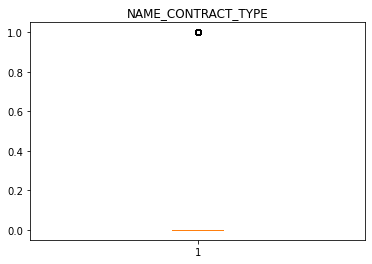

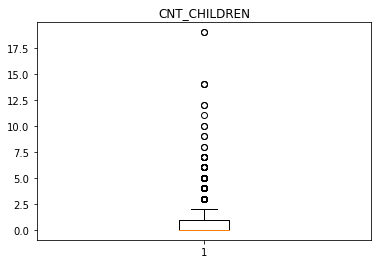

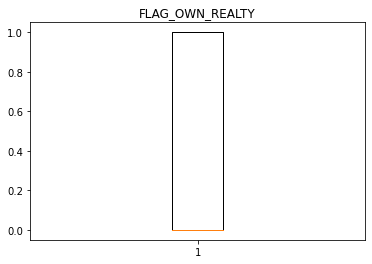

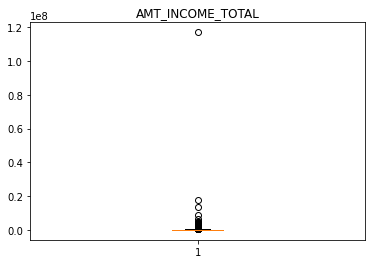

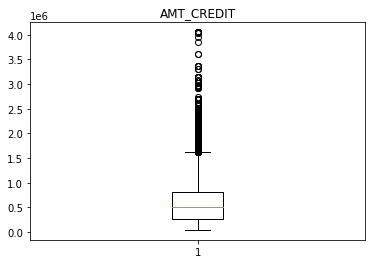

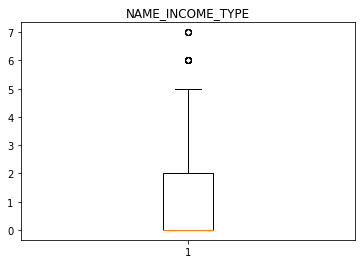

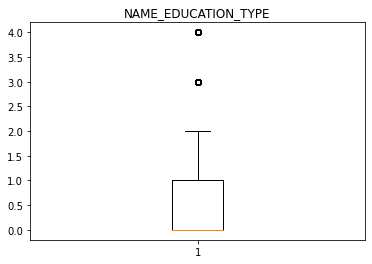

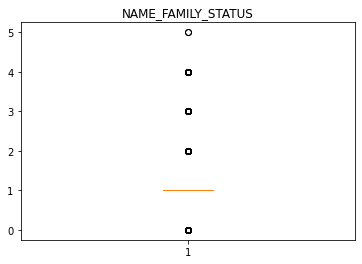

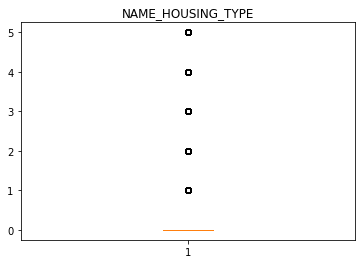

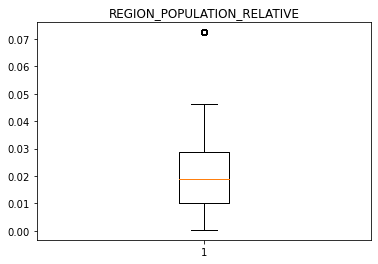

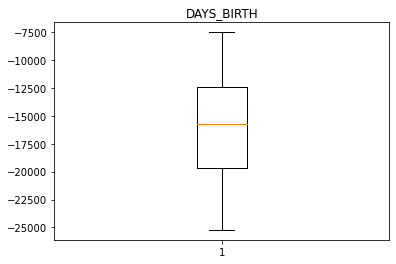

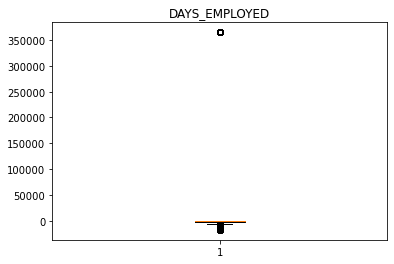

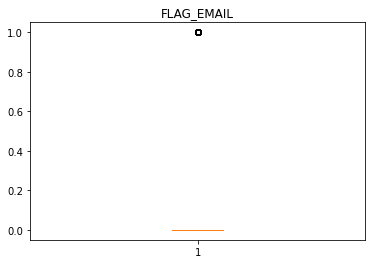

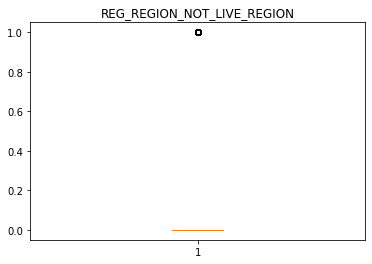

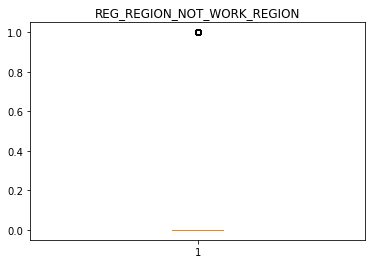

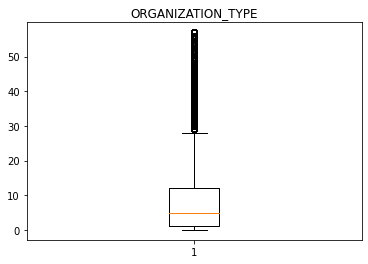

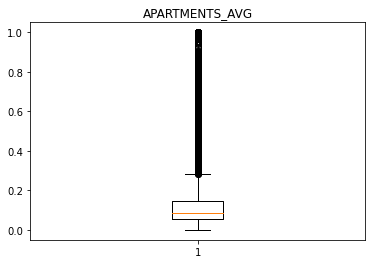

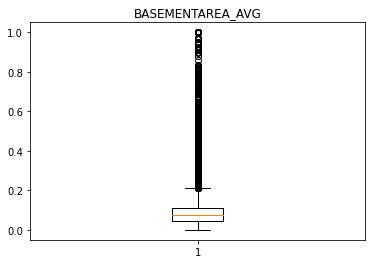

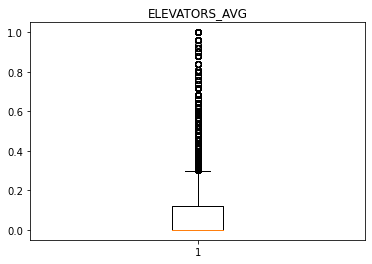

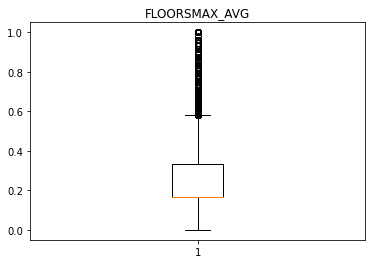

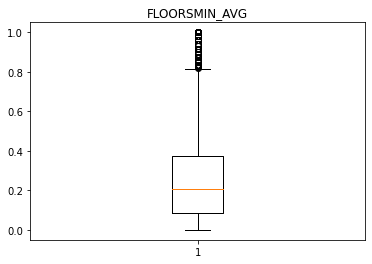

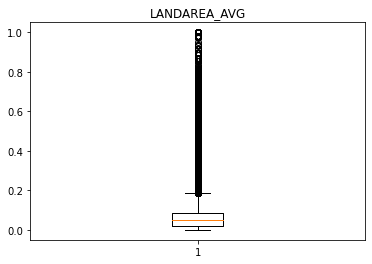

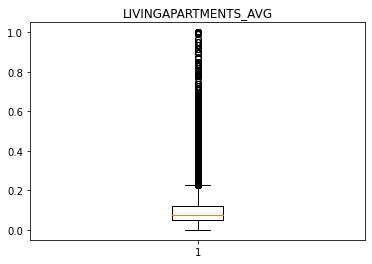

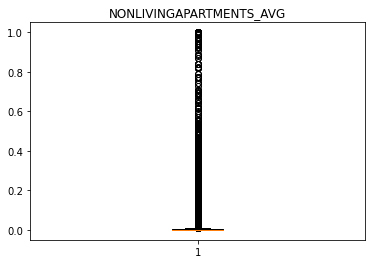

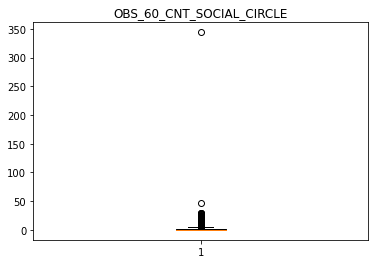

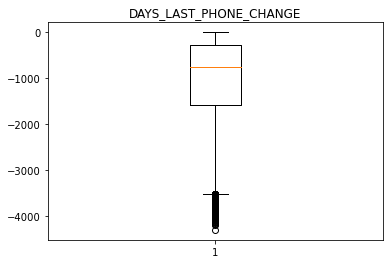

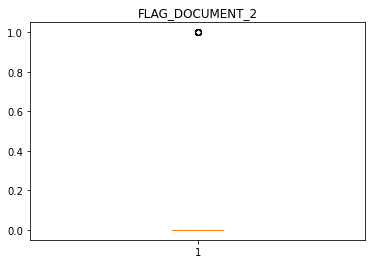

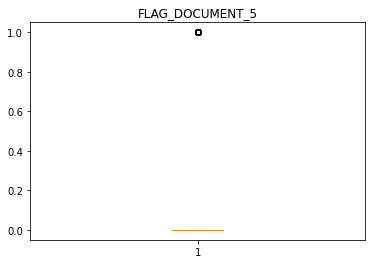

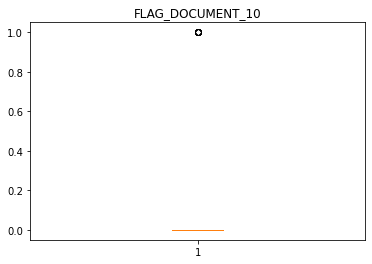

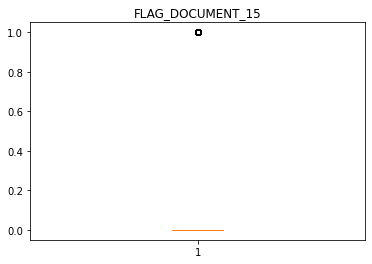

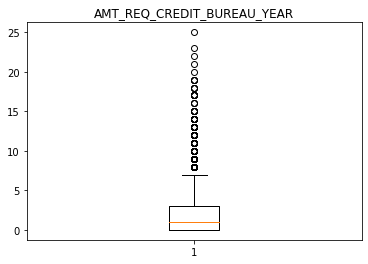

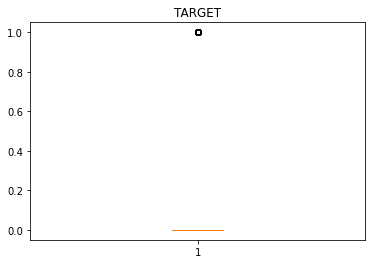

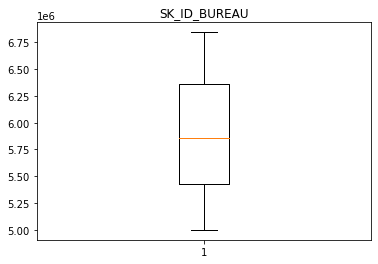

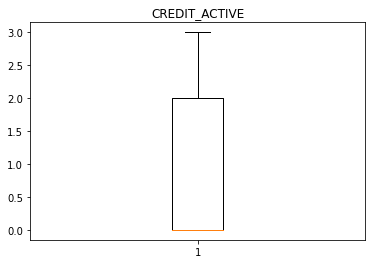

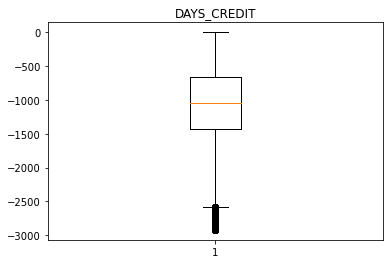

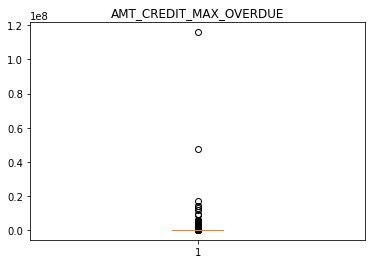

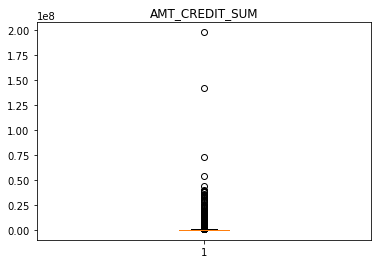

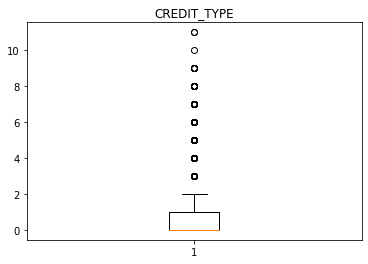

In [27]:
for col in  join_data.columns:
    plt.boxplot(join_data[col][~np.isnan(join_data[col])])
    plt.title(col)
    plt.show()

# Univariate Analysis

# Histogram Plot

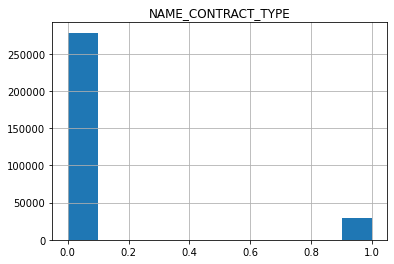

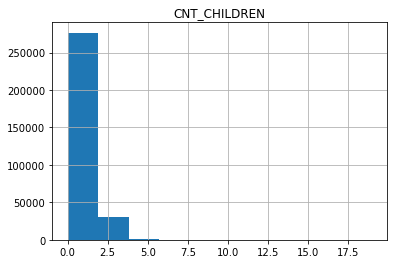

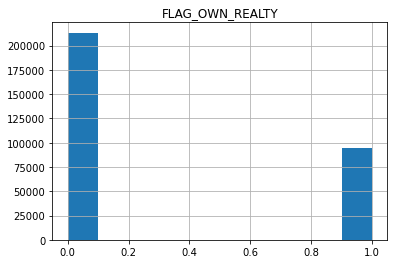

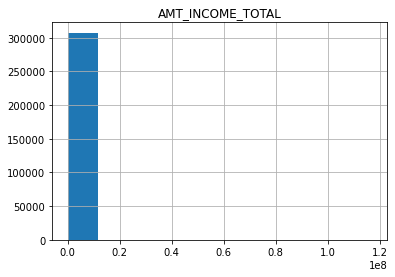

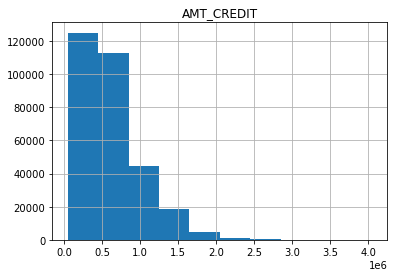

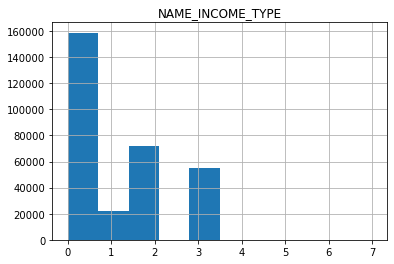

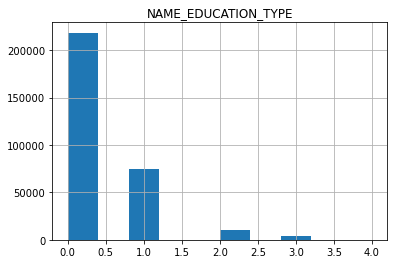

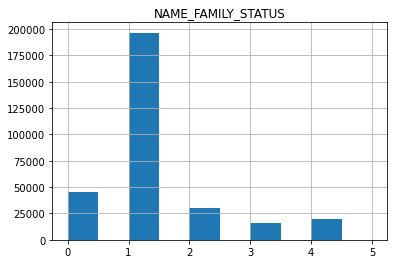

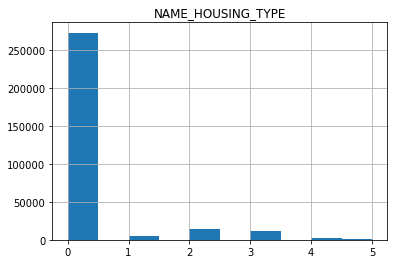

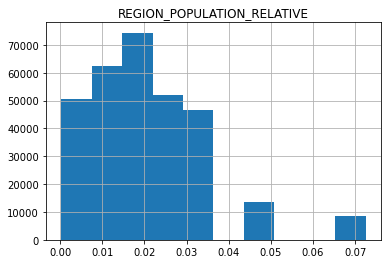

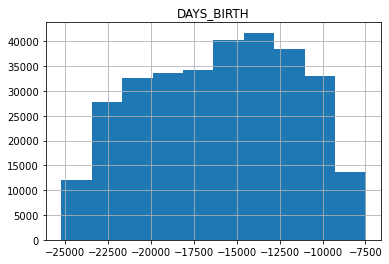

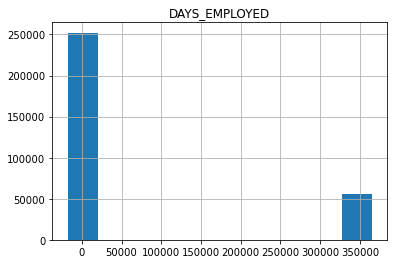

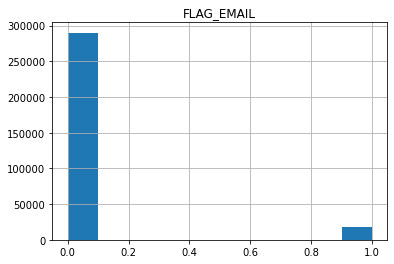

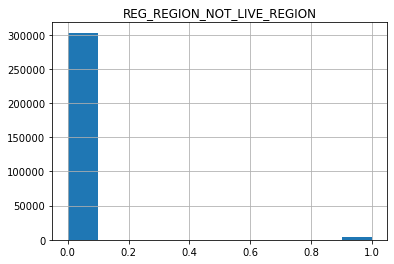

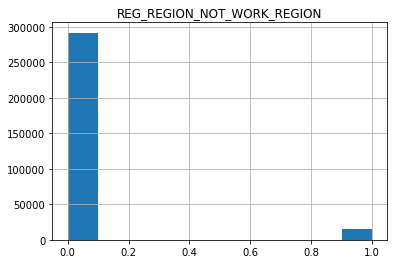

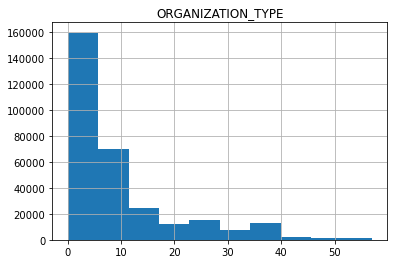

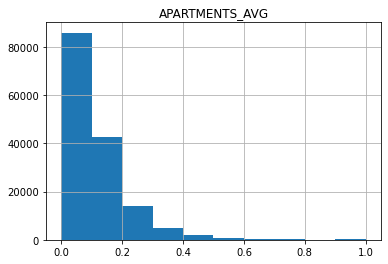

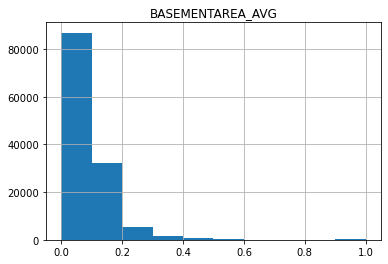

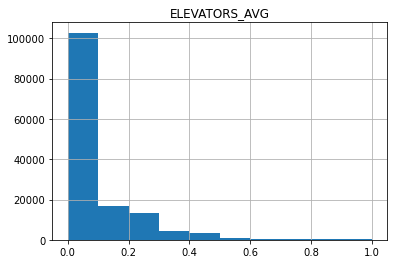

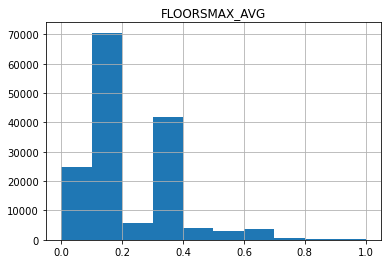

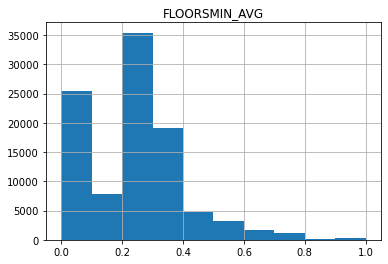

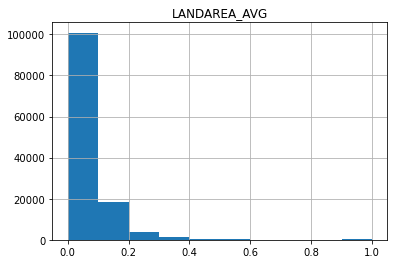

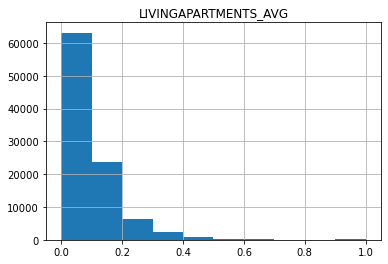

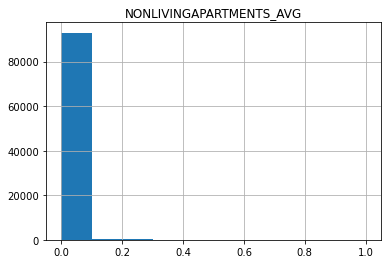

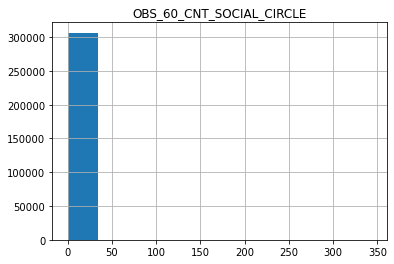

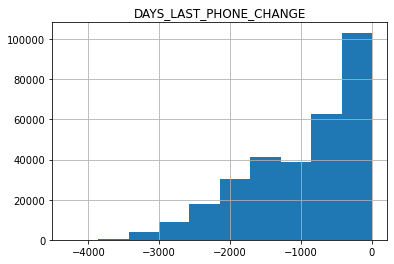

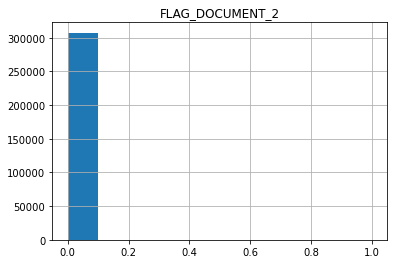

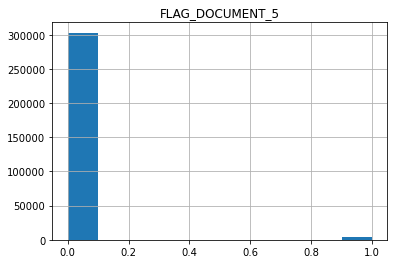

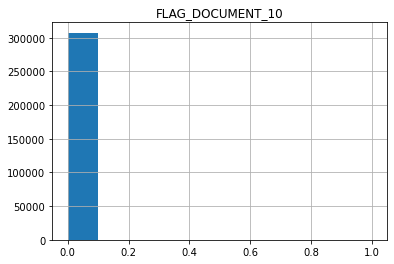

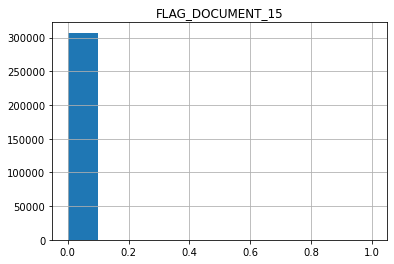

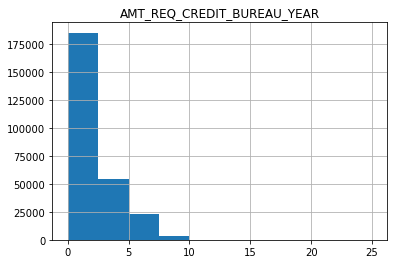

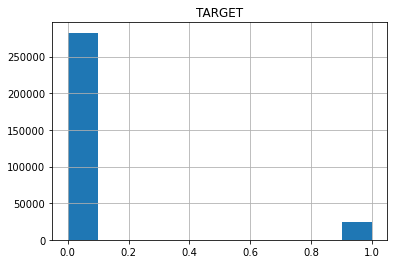

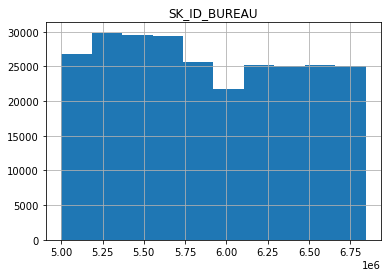

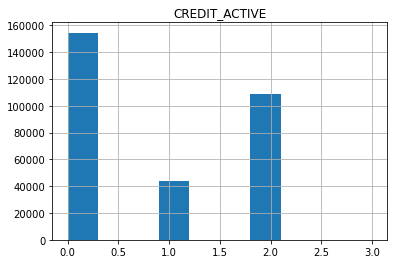

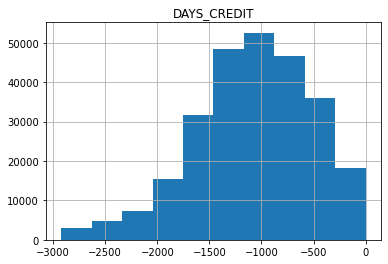

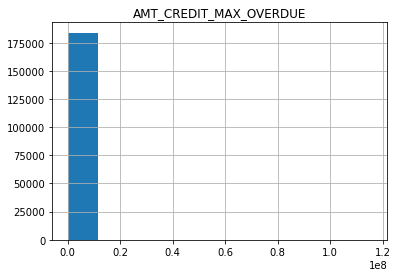

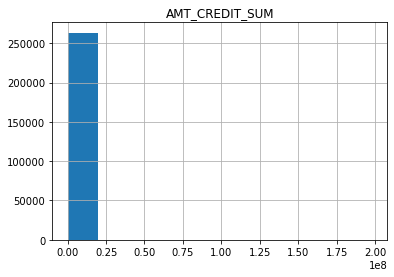

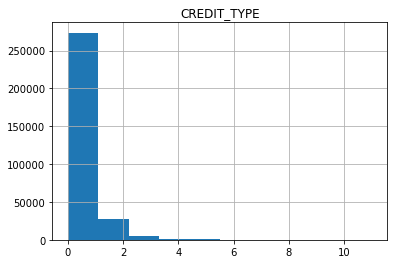

In [28]:
for col in join_data.columns:
    join_data[col].hist()
    plt.title(col)
    plt.show()

# Bivariate Analysis

# Continuous Data Bivariate Analysis

In [29]:
df = pd.DataFrame(columns=["X_bin_DAYS_BIRTH"])
df["X_bin_DAYS_BIRTH"] = pd.qcut(join_data['DAYS_BIRTH'], 10,
                            labels = False)
df["TARGET"] = join_data["TARGET"]
df.sort_values("X_bin_DAYS_BIRTH",ascending=True,inplace=True)
df

,X_bin_DAYS_BIRTH,TARGET
137267,0,0
25708,0,0
68132,0,0
121623,0,0
96518,0,0
...,...,...
93397,9,1
93366,9,0
253959,9,0
93447,9,1


In [30]:
a = df.groupby(["X_bin_DAYS_BIRTH"]).agg({"TARGET":"sum"})
a.rename(columns = {'TARGET':'SumOfTARGET'}, inplace = True)
a.reset_index(level=0, inplace=True)
a

,X_bin_DAYS_BIRTH,SumOfTARGET
0,0,1508
1,1,1668
2,2,1950
3,3,2194
4,4,2397
5,5,2434
6,6,2721
7,7,3015
8,8,3380
9,9,3558


In [31]:
b = df.groupby(["X_bin_DAYS_BIRTH"]).agg({"TARGET":"count"})
b.rename(columns = {'TARGET':'CountOfTARGET'}, inplace = True)
b.reset_index(level=0, inplace=True)
b

,X_bin_DAYS_BIRTH,CountOfTARGET
0,0,30756
1,1,30755
2,2,30757
3,3,30741
4,4,30761
5,5,30756
6,6,30740
7,7,30755
8,8,30736
9,9,30751


In [32]:
data = pd.merge(a, b, on='X_bin_DAYS_BIRTH', how='left')
data.head()

,X_bin_DAYS_BIRTH,SumOfTARGET,CountOfTARGET
0,0,1508,30756
1,1,1668,30755
2,2,1950,30757
3,3,2194,30741
4,4,2397,30761


In [33]:
data["PersentageOFTarget"] = (data["SumOfTARGET"]/data["CountOfTARGET"])*100
data

,X_bin_DAYS_BIRTH,SumOfTARGET,CountOfTARGET,PersentageOFTarget
0,0,1508,30756,4.903108
1,1,1668,30755,5.423508
2,2,1950,30757,6.340020
3,3,2194,30741,7.137048
4,4,2397,30761,7.792334
5,5,2434,30756,7.913903
6,6,2721,30740,8.851659
7,7,3015,30755,9.803284
8,8,3380,30736,10.996877
9,9,3558,30751,11.570355


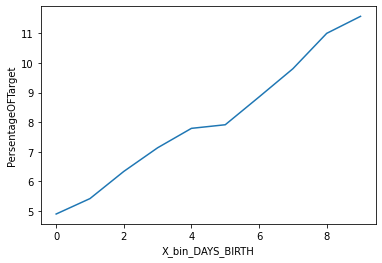

In [34]:
plt.plot(data["X_bin_DAYS_BIRTH"],data["PersentageOFTarget"])
plt.xlabel("X_bin_DAYS_BIRTH")
plt.ylabel("PersentageOFTarget")
plt.show()

In [35]:
def con_bivar(col):
    df = pd.DataFrame(columns=["X_bin_"+ col])
    df["X_bin_"+col] = pd.qcut(join_data[col], 10,
                                labels = False,duplicates='drop')
    df["TARGET"] = join_data["TARGET"]
    df.sort_values("X_bin_"+col,ascending=True,inplace=True)
    a = df.groupby(["X_bin_"+col]).agg({"TARGET":"sum"})
    a.rename(columns = {'TARGET':'SumOfTARGET'}, inplace = True)
    a.reset_index(level=0, inplace=True)
    b = df.groupby(["X_bin_"+col]).agg({"TARGET":"count"})
    b.rename(columns = {'TARGET':'CountOfTARGET'}, inplace = True)
    b.reset_index(level=0, inplace=True)
    data = pd.merge(a, b, on='X_bin_'+col, how='left')
    data["PersentageOFTarget"] = (data["SumOfTARGET"]/data["CountOfTARGET"])*100
    plt.plot(data["X_bin_"+col],data["PersentageOFTarget"])
    plt.title("PersentageOF "+col)
    plt.ylabel("PersentageOFTarget")
    plt.xlabel("X_bin_"+col)
    plt.show()

In [36]:
con_colums = ["AMT_INCOME_TOTAL","AMT_CREDIT","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","APARTMENTS_AVG",
          "BASEMENTAREA_AVG","ELEVATORS_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
         "NONLIVINGAPARTMENTS_AVG","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_YEAR","DAYS_CREDIT","AMT_CREDIT_MAX_OVERDUE",
         "AMT_CREDIT_SUM"]
len(con_colums)

19

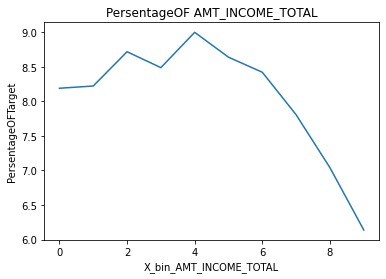

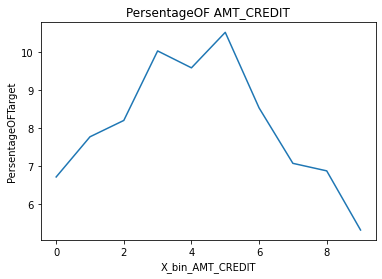

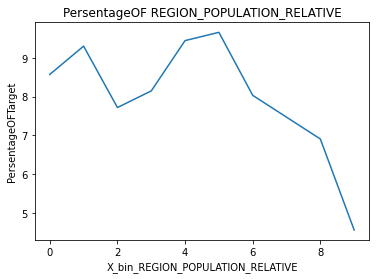

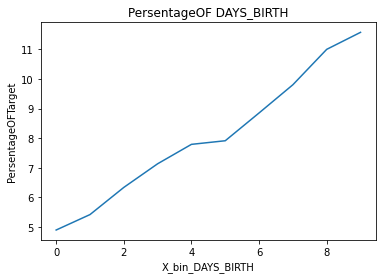

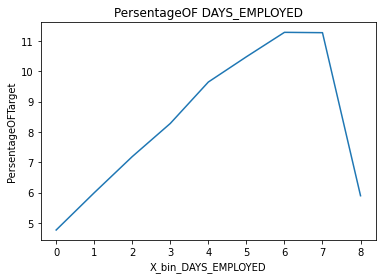

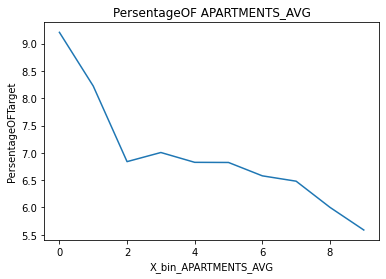

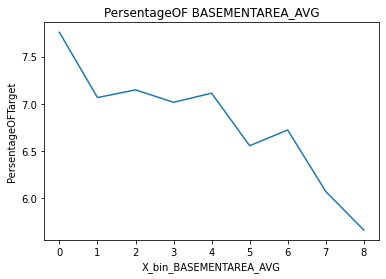

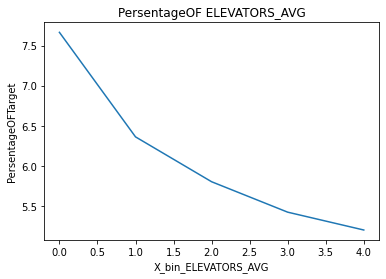

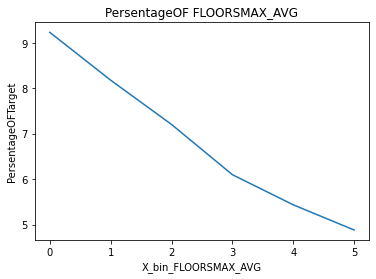

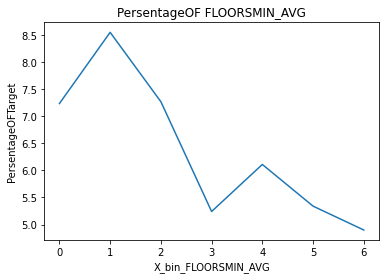

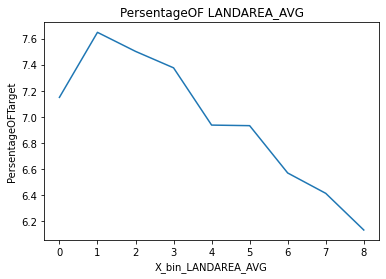

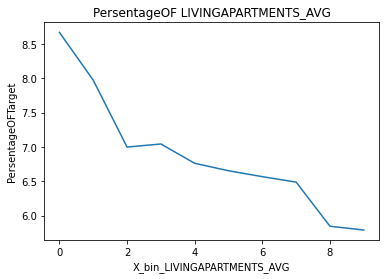

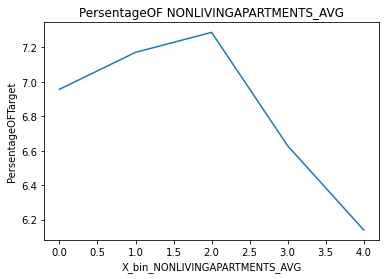

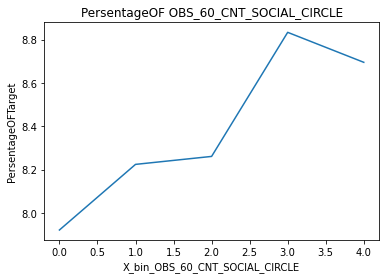

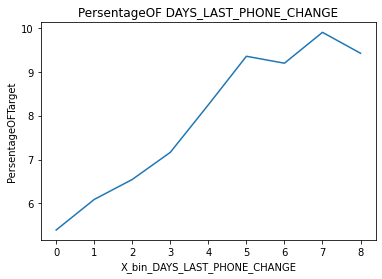

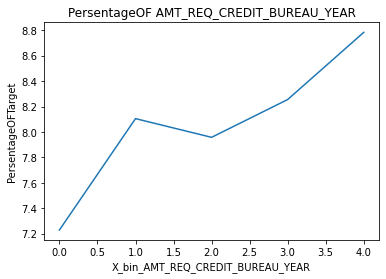

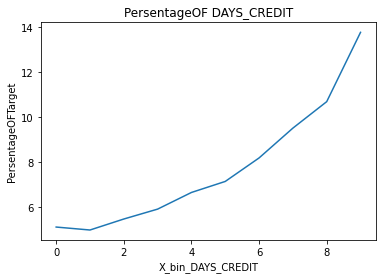

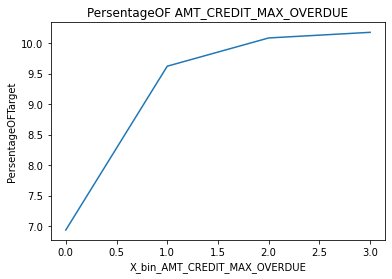

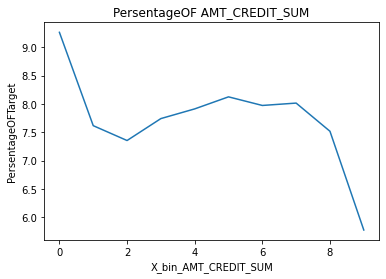

In [37]:
for col in con_colums:
    con_bivar(col)

# Categorical Data Bivariate Analysis

In [38]:
df = pd.DataFrame()
df["NAME_CONTRACT_TYPE"] = join_data["NAME_CONTRACT_TYPE"]
df["TARGET"] = join_data["TARGET"]
df

,NAME_CONTRACT_TYPE,TARGET
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
307506,0,0
307507,0,0
307508,0,0
307509,0,1


In [39]:
a = df.groupby(["NAME_CONTRACT_TYPE"]).agg({"TARGET":"sum"})
a.rename(columns = {'TARGET':'SumOfTARGET'}, inplace = True)
a.reset_index(level=0, inplace=True)
a

,NAME_CONTRACT_TYPE,SumOfTARGET
0,0,23221
1,1,1604


In [40]:
b = df.groupby(["NAME_CONTRACT_TYPE"]).agg({"TARGET":"count"})
b.rename(columns = {'TARGET':'CountOfTARGET'}, inplace = True)
b.reset_index(level=0, inplace=True)
b

,NAME_CONTRACT_TYPE,CountOfTARGET
0,0,278229
1,1,29279


In [41]:
data = pd.merge(a, b, on='NAME_CONTRACT_TYPE', how='left')
data.head()

,NAME_CONTRACT_TYPE,SumOfTARGET,CountOfTARGET
0,0,23221,278229
1,1,1604,29279


In [42]:
data["PersentageOFTarget"] = (data["SumOfTARGET"]/data["CountOfTARGET"])*100
data

,NAME_CONTRACT_TYPE,SumOfTARGET,CountOfTARGET,PersentageOFTarget
0,0,23221,278229,8.346003
1,1,1604,29279,5.478329


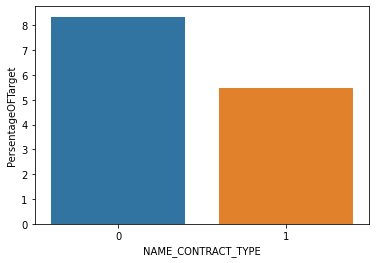

In [43]:
sns.barplot(x="NAME_CONTRACT_TYPE",y="PersentageOFTarget",data=data)
plt.show()

In [44]:
def cat_bivar(col):
    df = pd.DataFrame()
    df[col] = join_data[col]
    df["TARGET"] = join_data["TARGET"]
    a = df.groupby([col]).agg({"TARGET":"sum"})
    a.rename(columns = {'TARGET':'SumOfTARGET'}, inplace = True)
    a.reset_index(level=0, inplace=True)
    b = df.groupby([col]).agg({"TARGET":"count"})
    b.rename(columns = {'TARGET':'CountOfTARGET'}, inplace = True)
    b.reset_index(level=0, inplace=True)
    data = pd.merge(a, b, on=col, how='left')
    data["PersentageOFTarget"] = (data["SumOfTARGET"]/data["CountOfTARGET"])*100
    if col == "ORGANIZATION_TYPE":
        plt.figure(figsize=(20,8))
    sns.barplot(x=col,y="PersentageOFTarget",data=data)
    plt.title(col)
    plt.show()

In [45]:
cat_colums = ["NAME_CONTRACT_TYPE","CNT_CHILDREN","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
             "NAME_HOUSING_TYPE","FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "ORGANIZATION_TYPE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_5","FLAG_DOCUMENT_10","FLAG_DOCUMENT_15","CREDIT_ACTIVE","CREDIT_TYPE"]
len(cat_colums)

17

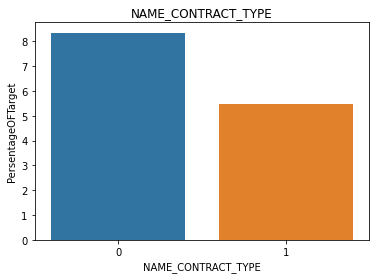

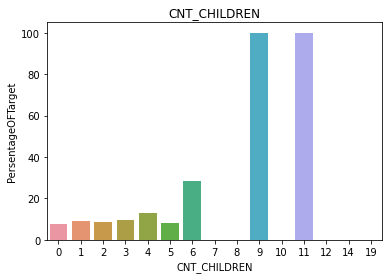

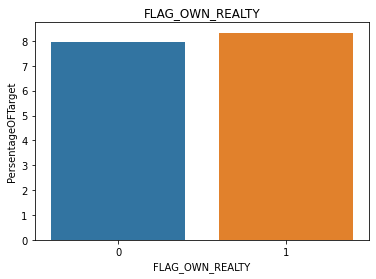

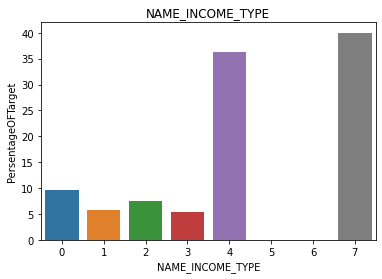

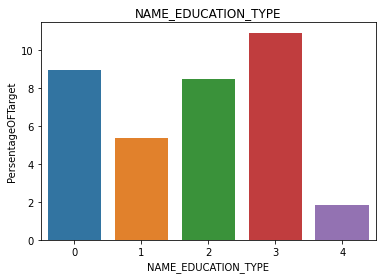

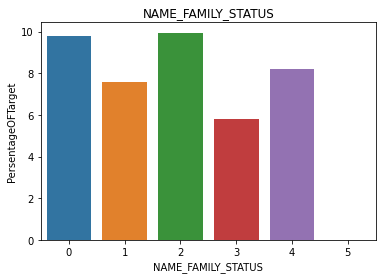

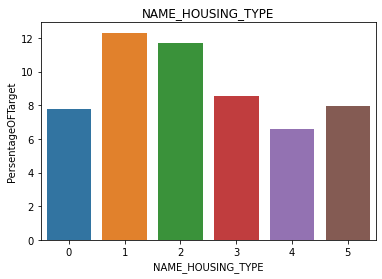

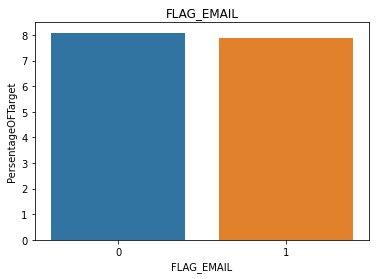

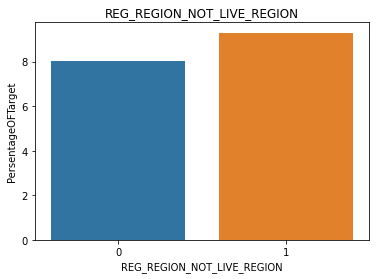

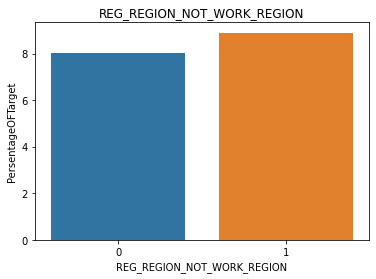

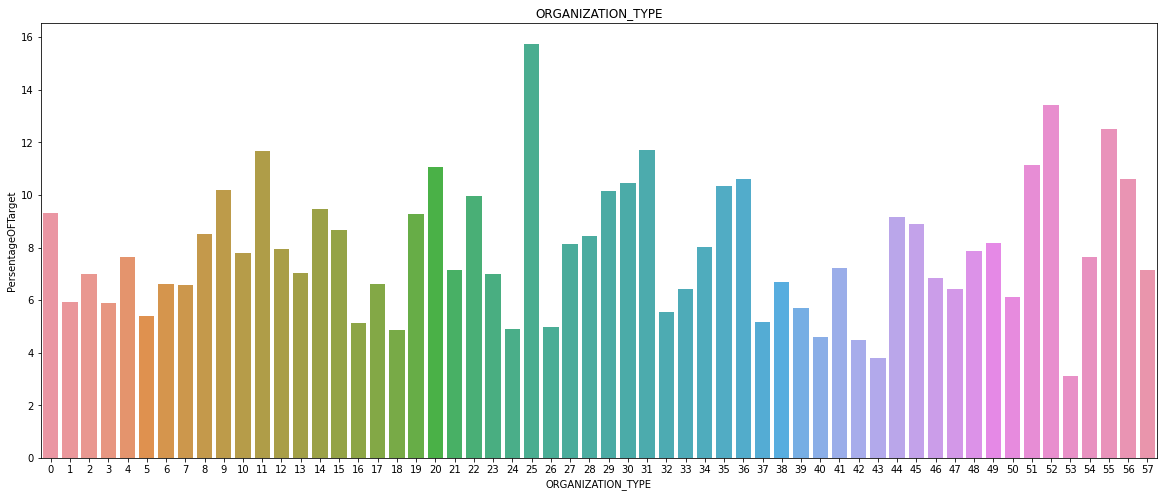

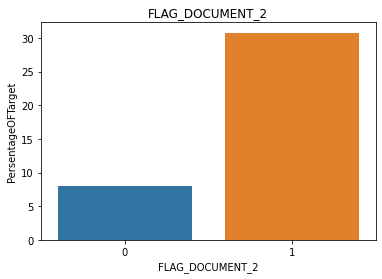

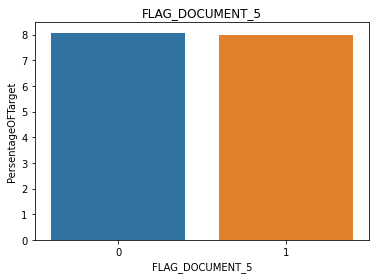

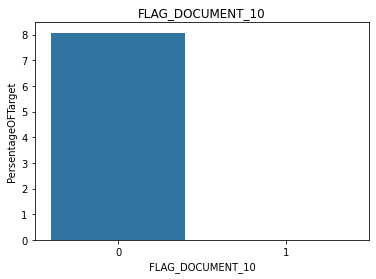

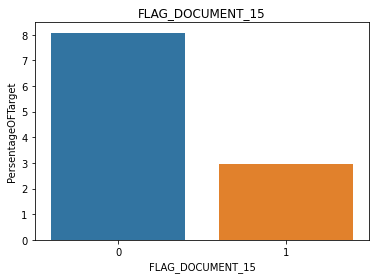

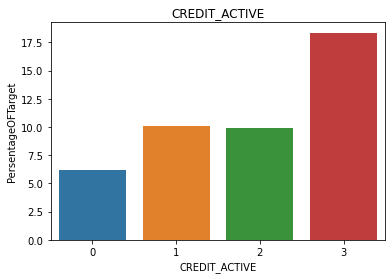

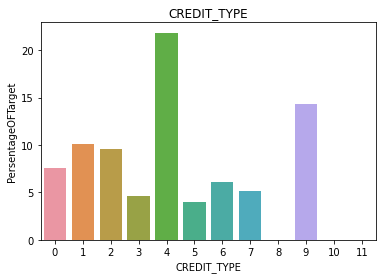

In [46]:
for col in cat_colums:
    cat_bivar(col)

# Correlation Matrix

In [47]:
join_data.corr()

,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,CREDIT_TYPE
NAME_CONTRACT_TYPE,1.000000,0.029997,-0.067175,-0.003530,-0.221651,-0.032165,0.045061,-0.024441,0.011684,0.026868,...,0.014708,-0.007784,-0.052494,-0.030897,0.327477,0.028353,0.039851,0.002017,0.023114,0.035858
CNT_CHILDREN,0.029997,1.000000,0.002373,0.012885,0.002152,-0.199095,0.021768,-0.016916,0.018452,-0.025574,...,-0.002756,0.003609,-0.041550,0.019187,0.009227,0.007208,0.026094,-0.001917,0.035287,0.001992
FLAG_OWN_REALTY,-0.067175,0.002373,1.000000,-0.002940,0.039258,-0.055673,0.028632,-0.024303,0.195648,-0.015174,...,-0.003171,0.035729,-0.067451,0.006151,-0.049685,0.007579,0.004221,-0.000621,-0.001694,0.003370
AMT_INCOME_TOTAL,-0.003530,0.012885,-0.002940,1.000000,0.156859,-0.002581,0.063804,-0.009357,-0.002325,0.074798,...,0.000290,0.010793,0.011690,-0.003981,0.001529,0.007974,-0.008837,0.007640,0.097795,0.024022
AMT_CREDIT,-0.221651,0.002152,0.039258,0.156859,1.000000,0.015734,0.065613,-0.030487,-0.028337,0.099745,...,-0.003100,0.032253,-0.048448,-0.030369,-0.116782,-0.027334,-0.084393,0.006313,0.116087,0.019868
NAME_INCOME_TYPE,-0.032165,-0.199095,-0.055673,-0.002581,0.015734,1.000000,0.007163,0.082000,-0.044032,0.097061,...,-0.001430,-0.006163,0.035126,-0.057019,-0.014131,-0.024048,-0.051901,-0.002098,-0.012286,-0.008029
NAME_EDUCATION_TYPE,0.045061,0.021768,0.028632,0.063804,0.065613,0.007163,1.000000,-0.045184,0.022461,0.049637,...,-0.000498,0.013127,-0.051393,-0.032431,0.010691,0.018266,0.021792,0.006963,0.085917,0.044050
NAME_FAMILY_STATUS,-0.024441,-0.016916,-0.024303,-0.009357,-0.030487,0.082000,-0.045184,1.000000,-0.026753,-0.000579,...,0.002264,-0.005478,0.018853,-0.010696,-0.012326,-0.034344,-0.049006,-0.000112,-0.031140,-0.027165
NAME_HOUSING_TYPE,0.011684,0.018452,0.195648,-0.002325,-0.028337,-0.044032,0.022461,-0.026753,1.000000,0.012312,...,0.000890,0.000018,-0.007290,0.018334,-0.000347,0.025919,0.041054,-0.001478,-0.013243,0.014587
REGION_POPULATION_RELATIVE,0.026868,-0.025574,-0.015174,0.074798,0.099745,0.097061,0.049637,-0.000579,0.012312,1.000000,...,0.001992,0.009446,0.001003,-0.037227,0.011080,0.021292,-0.019976,0.003849,0.073782,0.076129


# Heatmap

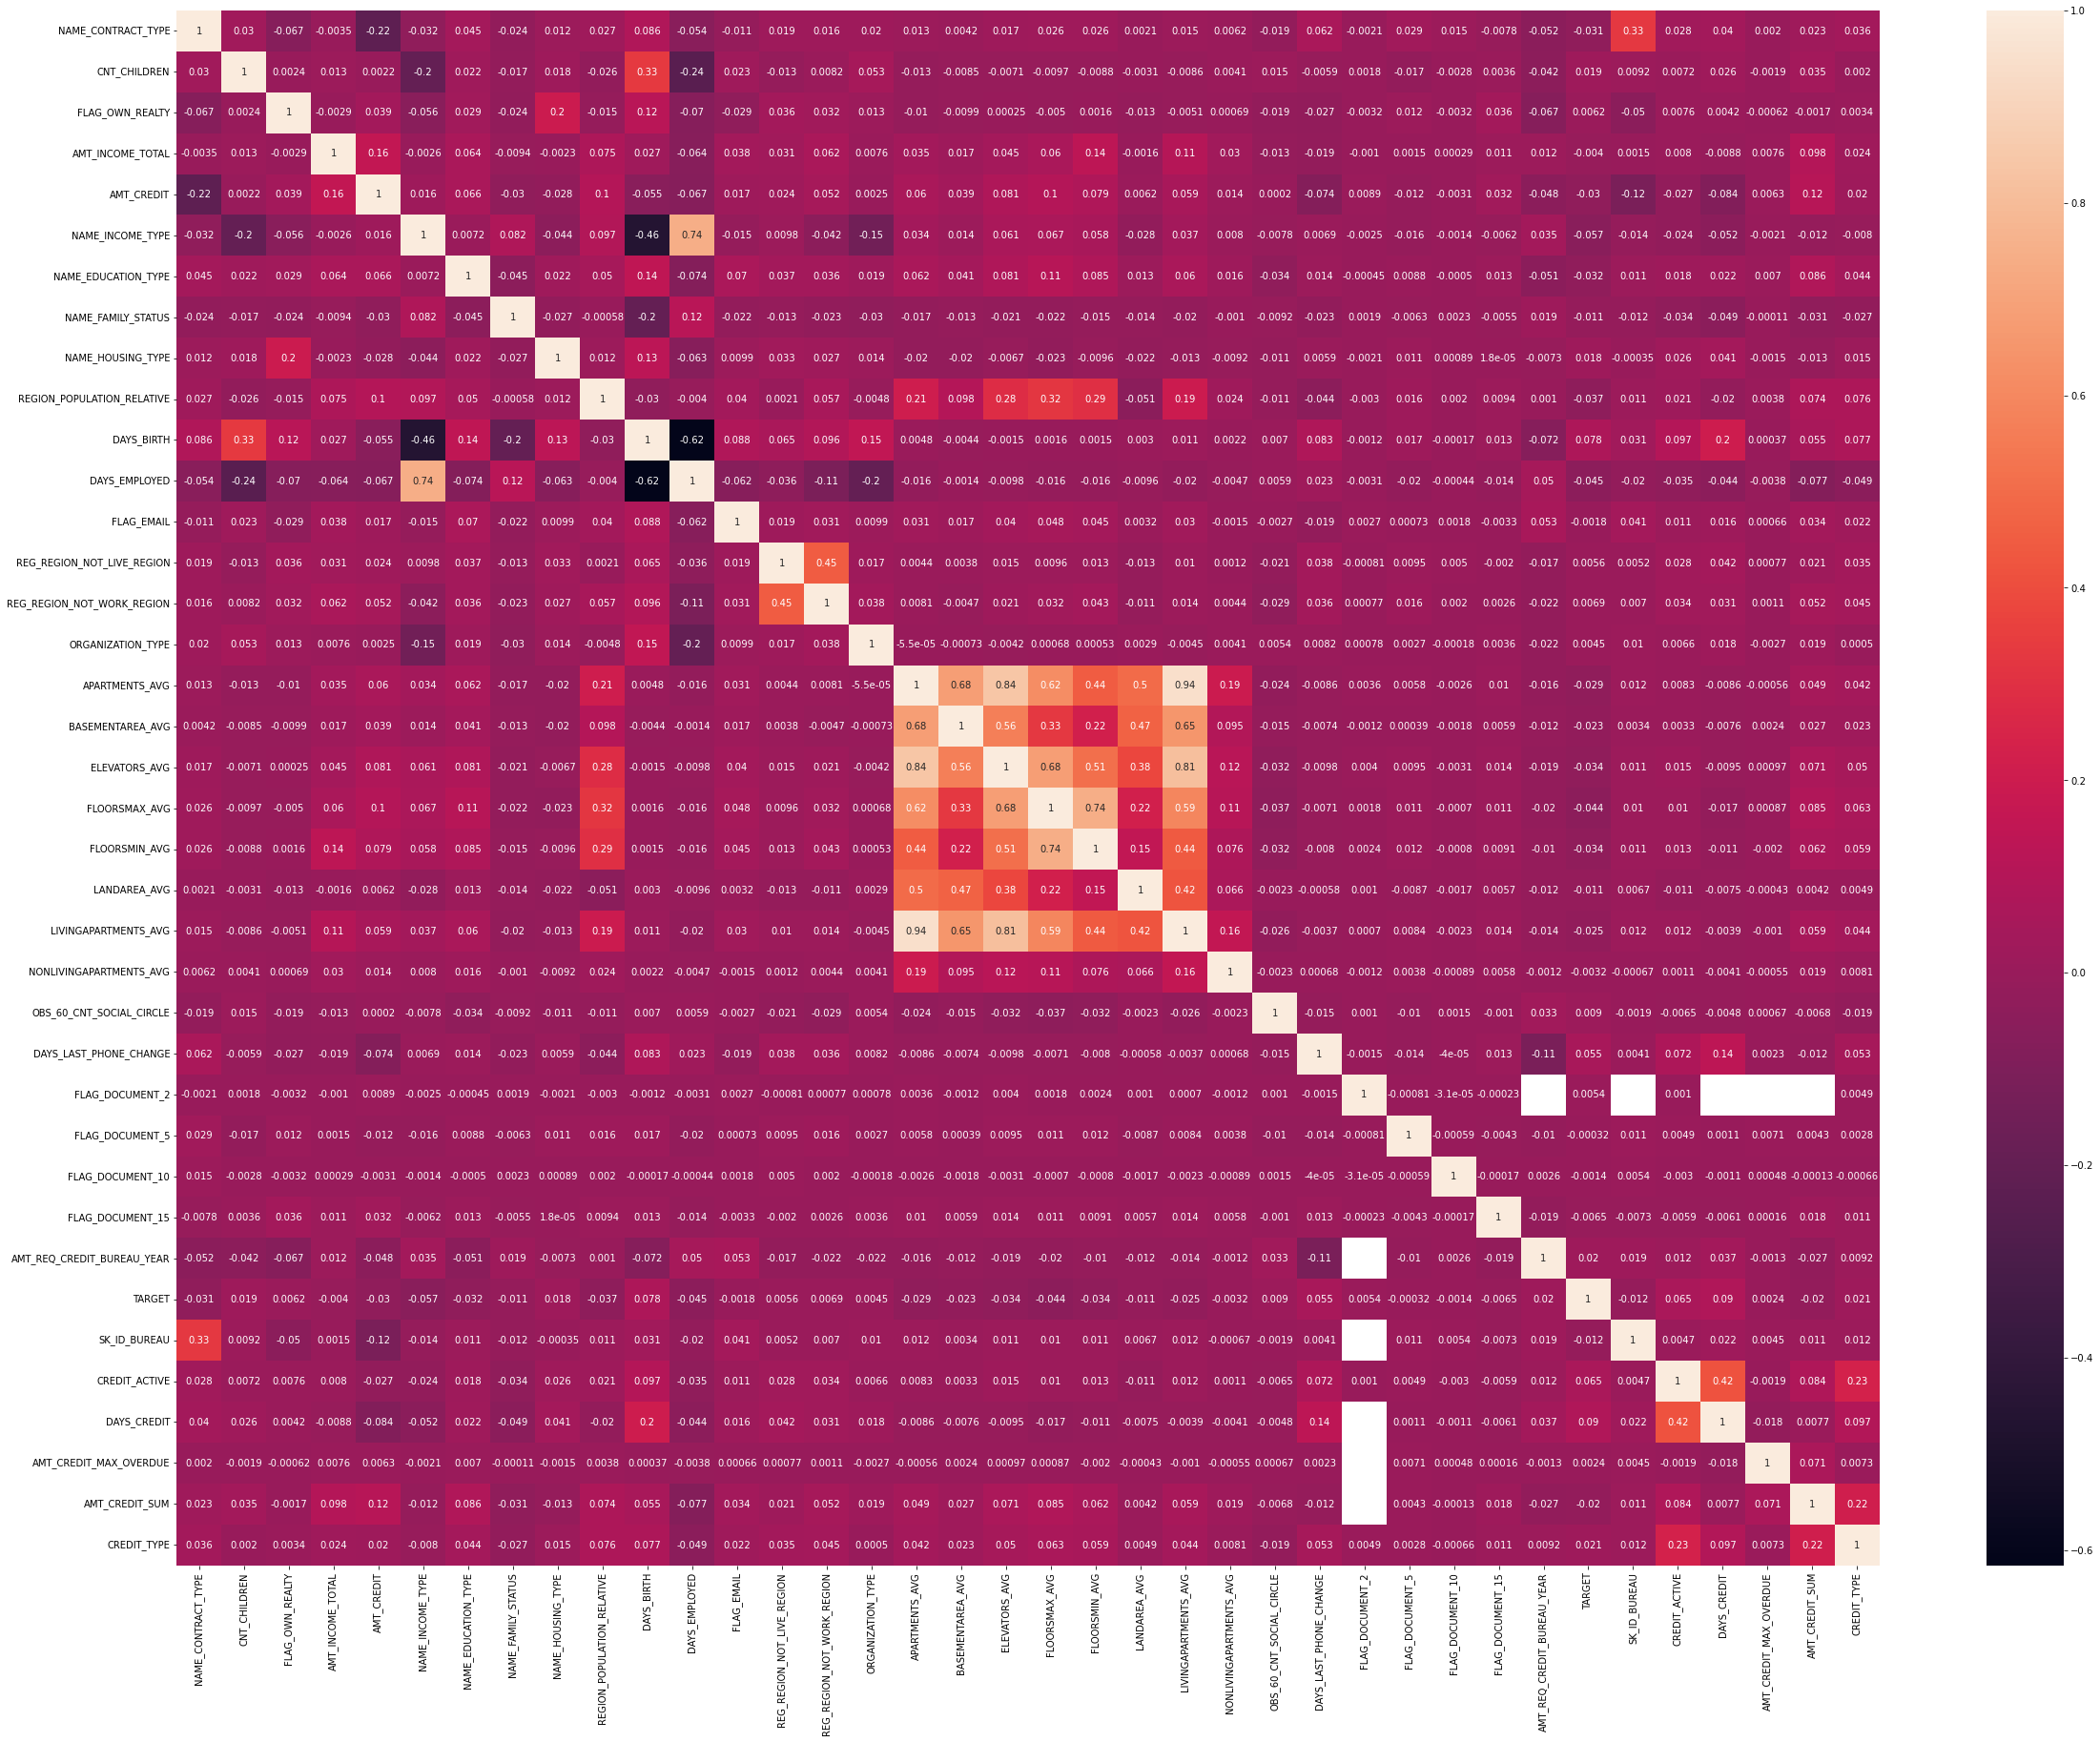

In [48]:
plt.figure(figsize=(40,30))
sns.heatmap(join_data.corr(),annot=True)
plt.show()

# Handling Missing Values

In [49]:
join_data = join_data.drop(["APARTMENTS_AVG","BASEMENTAREA_AVG","ELEVATORS_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG",
                           "LIVINGAPARTMENTS_AVG","NONLIVINGAPARTMENTS_AVG","AMT_CREDIT_MAX_OVERDUE","SK_ID_BUREAU"],axis=1)

In [50]:
join_data.isnull().sum()

NAME_CONTRACT_TYPE                0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_EMAIL                        0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                 0
OBS_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_15                  0
AMT_REQ_CREDIT_BUREAU_YEAR    41516
TARGET                            0
CREDIT_ACTIVE                     0
DAYS_CREDIT                   44017
AMT_CREDIT_SUM                44018
CREDIT_TYPE                 

In [51]:
join_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna( value =join_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mean(), inplace = True)
join_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(value = join_data["OBS_60_CNT_SOCIAL_CIRCLE"].mean(),inplace = True)
join_data["DAYS_CREDIT"].fillna(value = join_data["DAYS_CREDIT"].mean(),inplace = True)
join_data["AMT_CREDIT_SUM"].fillna(value = join_data["AMT_CREDIT_SUM"].mean(),inplace=True)
join_data["DAYS_LAST_PHONE_CHANGE"].fillna(value = join_data["DAYS_LAST_PHONE_CHANGE"].mean(),inplace=True)

# Handling Outliers

In [52]:
colums =['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','OBS_60_CNT_SOCIAL_CIRCLE',
              'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_CREDIT','AMT_CREDIT_SUM']

In [53]:
for col in colums:
    q1 = join_data[col].quantile(0.05)
    q3 = join_data[col].quantile(0.95)
    join_data[col].clip(upper=q3,lower=q1,inplace=True)

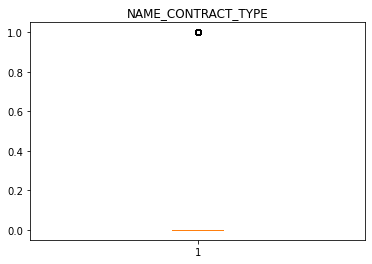

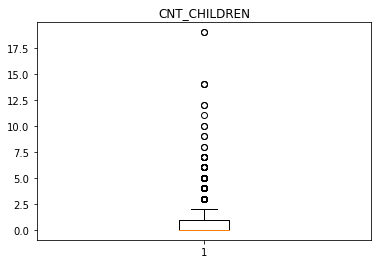

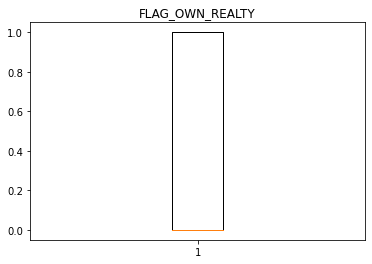

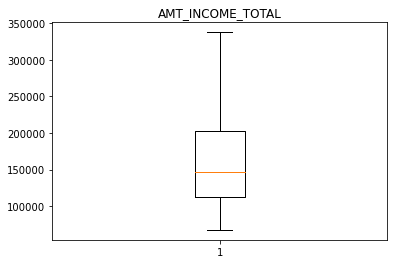

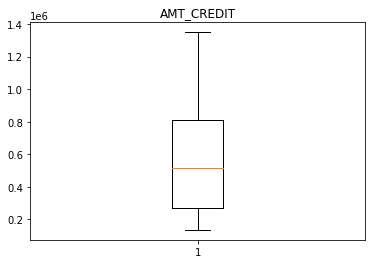

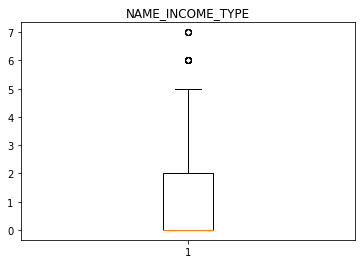

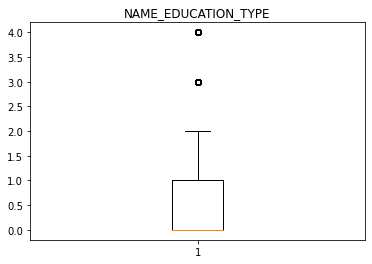

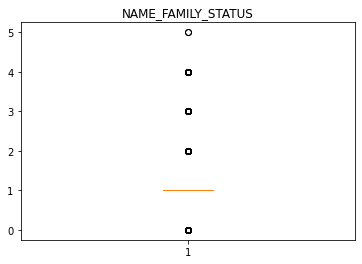

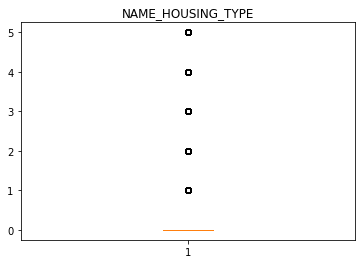

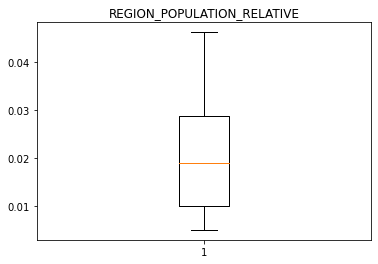

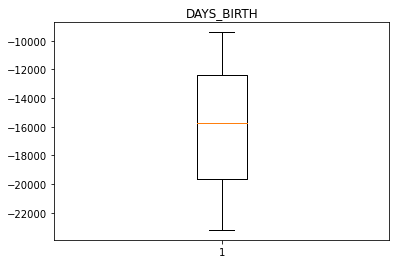

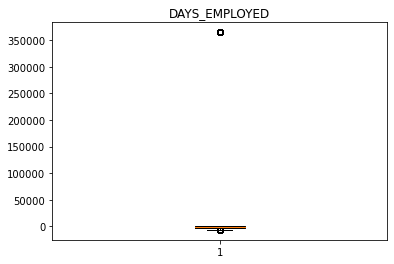

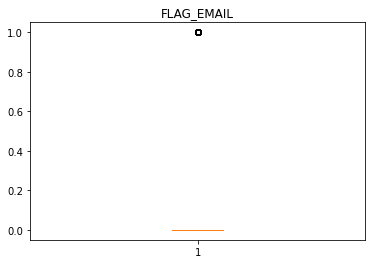

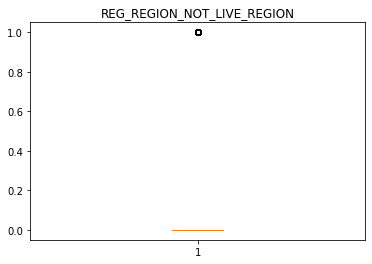

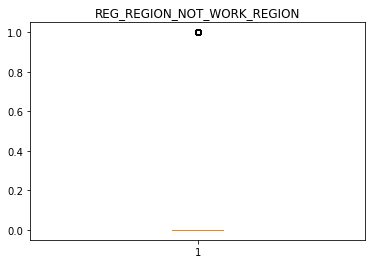

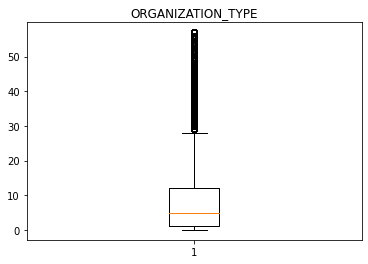

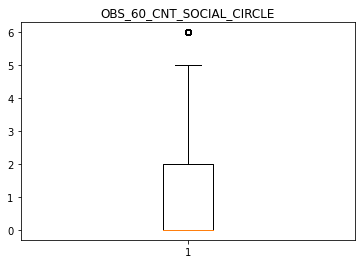

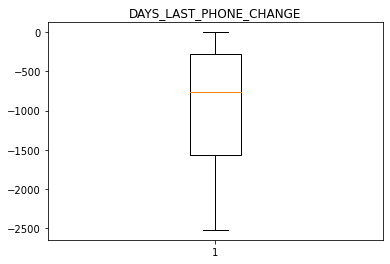

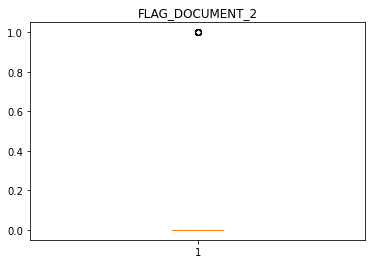

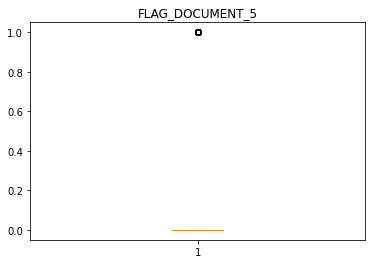

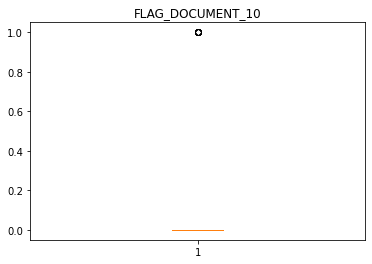

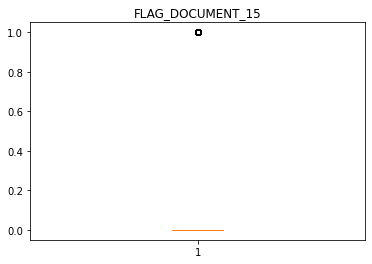

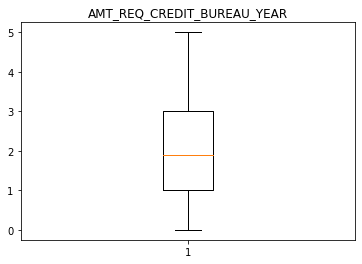

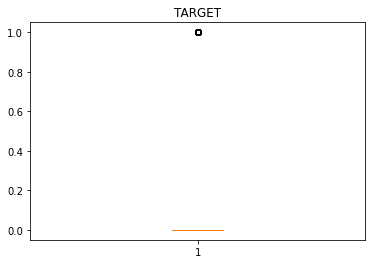

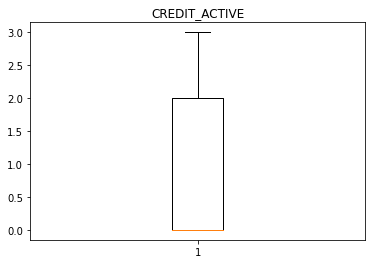

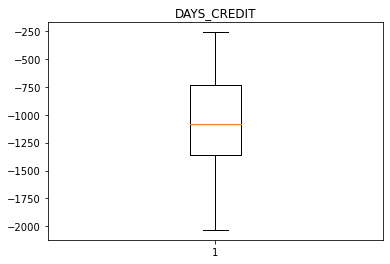

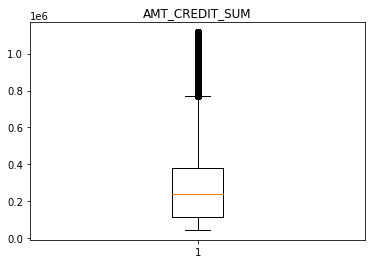

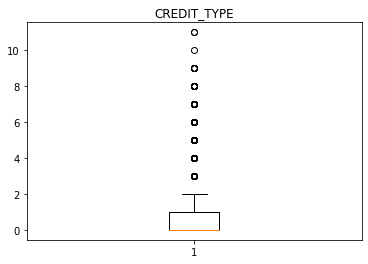

In [54]:
for col in  join_data.columns:
    plt.boxplot(join_data[col])
    plt.title(col)
    plt.show()

# Standardization for Continuous variables

In [55]:
sat_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','OBS_60_CNT_SOCIAL_CIRCLE',
              'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_CREDIT','AMT_CREDIT_SUM']

In [56]:
for col in sat_columns:
    mean = join_data[col].mean()
    std = join_data[col].std()
    join_data[col] = (join_data[col] - mean)/std

In [57]:
join_data

,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,CREDIT_TYPE
0,0,0,0,0.542387,-0.499579,0,0,0,0,-0.123939,...,0,0,0,0,-0.541873,1,0,0.419183,-0.767222,0
1,0,0,1,1.473201,1.989572,1,1,1,0,-1.325093,...,0,0,0,0,-1.207967,0,0,-0.701396,-0.232599,0
2,1,0,0,-1.319243,-1.261833,0,0,0,0,-0.884933,...,0,0,0,0,-1.207967,0,0,0.434074,-0.816996,0
3,0,0,0,-0.388428,-0.763157,0,0,2,0,-1.059626,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
4,0,0,0,-0.574591,-0.200954,0,0,0,0,0.731908,...,0,0,0,0,-1.207967,0,0,-0.165837,-0.627850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,-0.078156,-0.925888,0,0,4,2,1.070186,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307507,0,0,0,-1.257188,-0.884211,3,0,3,0,0.428257,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307508,0,0,0,-0.140211,0.261185,0,1,4,0,-1.321448,...,0,0,0,0,-0.541873,0,2,0.433011,2.457185,0
307509,0,0,0,0.108007,-0.601992,2,0,1,0,-1.294459,...,0,0,0,0,-1.207967,1,0,-0.070106,-0.998054,0


# Balancing  Data

In [58]:
join_data["TARGET"].value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

In [59]:
from sklearn.utils import resample

df_majority = join_data[(join_data['TARGET']==0)] 
df_minority = join_data[(join_data['TARGET']==1)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 282683, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [60]:
df_upsampled

,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,CREDIT_TYPE
292662,0,0,0,-0.760754,-1.042016,0,0,2,3,0.041989,...,0,0,0,0,2.122502,1,0,-2.043218,-0.723609,0
194394,0,1,1,-0.884862,-0.377767,0,0,1,2,-0.495454,...,0,0,0,0,-0.541873,1,0,0.621015,0.099835,0
11104,0,1,1,1.473201,1.746668,2,0,0,2,2.255545,...,0,0,0,0,-1.207967,1,2,1.251507,-0.463314,2
66953,0,2,0,1.473201,-0.177716,0,0,1,0,0.428257,...,0,0,0,0,0.790315,1,0,0.295797,2.917884,0
266717,0,0,0,0.852658,-0.365138,0,1,2,1,-0.495454,...,0,0,0,0,1.456408,1,2,0.693804,1.293173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,0,0,0,-0.698699,-1.009243,3,0,0,0,0.223103,...,0,0,0,0,-1.207967,0,0,-1.267965,-0.123666,0
307506,0,0,1,-0.078156,-0.925888,0,0,4,2,1.070186,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307507,0,0,0,-1.257188,-0.884211,3,0,3,0,0.428257,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307508,0,0,0,-0.140211,0.261185,0,1,4,0,-1.321448,...,0,0,0,0,-0.541873,0,2,0.433011,2.457185,0


# Handling Duplicates for Balanced data

In [61]:
droped_data = df_upsampled.drop_duplicates()
droped_data

,NAME_CONTRACT_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_10,FLAG_DOCUMENT_15,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,CREDIT_TYPE
292662,0,0,0,-0.760754,-1.042016,0,0,2,3,0.041989,...,0,0,0,0,2.122502,1,0,-2.043218,-0.723609,0
194394,0,1,1,-0.884862,-0.377767,0,0,1,2,-0.495454,...,0,0,0,0,-0.541873,1,0,0.621015,0.099835,0
11104,0,1,1,1.473201,1.746668,2,0,0,2,2.255545,...,0,0,0,0,-1.207967,1,2,1.251507,-0.463314,2
66953,0,2,0,1.473201,-0.177716,0,0,1,0,0.428257,...,0,0,0,0,0.790315,1,0,0.295797,2.917884,0
266717,0,0,0,0.852658,-0.365138,0,1,2,1,-0.495454,...,0,0,0,0,1.456408,1,2,0.693804,1.293173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,0,0,0,-0.698699,-1.009243,3,0,0,0,0.223103,...,0,0,0,0,-1.207967,0,0,-1.267965,-0.123666,0
307506,0,0,1,-0.078156,-0.925888,0,0,4,2,1.070186,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307507,0,0,0,-1.257188,-0.884211,3,0,3,0,0.428257,...,0,0,0,0,0.057594,0,1,-0.025532,0.219800,1
307508,0,0,0,-0.140211,0.261185,0,1,4,0,-1.321448,...,0,0,0,0,-0.541873,0,2,0.433011,2.457185,0


# Logistic regression

In [62]:
A = ["DAYS_BIRTH","DAYS_LAST_PHONE_CHANGE","DAYS_CREDIT","AMT_INCOME_TOTAL","NAME_CONTRACT_TYPE","CNT_CHILDREN","NAME_INCOME_TYPE"
    ,"ORGANIZATION_TYPE","CREDIT_ACTIVE","CREDIT_TYPE"]
X = pd.DataFrame(df_upsampled[A])
y = df_upsampled["TARGET"]

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
score = model.score(X_test,y_test)
print("Score :", score)

Score : 0.6007202388532779


In [69]:
predit = model.predict(X_test)

In [99]:
predit

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# Confusion Matrix

In [70]:
from sklearn import metrics

In [71]:
confusion_matrix = metrics.confusion_matrix(y_test, predit)
confusion_matrix

array([[41863, 29093],
       [27342, 43044]], dtype=int64)

# Pression

In [72]:
pression = metrics.precision_score(y_test,predit)
print("pression : ",pression)

pression :  0.5966979497345329


# Recall

In [73]:
recall = metrics.recall_score(y_test,predit)
print("Recall : " ,recall)

Recall :  0.6115420680248913


# F1_Score

In [74]:
f1_score = metrics.f1_score(y_test,predit)
print("F1_score : ",f1_score)

F1_score :  0.6040288234179747


# Receiver operating characteristic curve 

In [108]:
model.predict_proba(X_test)

array([[0.50222348, 0.49777652],
       [0.60651792, 0.39348208],
       [0.70516306, 0.29483694],
       ...,
       [0.51450822, 0.48549178],
       [0.2682031 , 0.7317969 ],
       [0.83362024, 0.16637976]])

[0.49777652 0.39348208 0.29483694 ... 0.48549178 0.7317969  0.16637976]


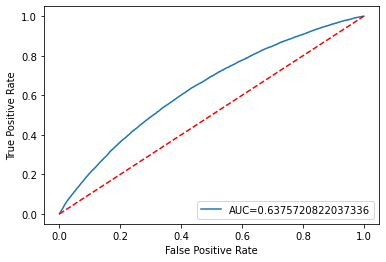

In [100]:
y_pred_proba = model.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Gini

In [76]:
gini = 2 *auc-1
gini

0.27514416440746725

# Concordance AND Discordance

In [77]:
pred_prob = pd.DataFrame({'label':y_test, 'prob':y_pred_proba}, columns=['label','prob'])
zeros_prob = pred_prob[pred_prob['label']==0]
ones_prob = pred_prob[pred_prob['label']==1]

In [78]:
from bisect import bisect_left, bisect_right

zeros_length = zeros_prob.shape[0]
ones_length = ones_prob.shape[0]

zeros_list = sorted([zeros_prob.iloc[j,1] for j in range(zeros_length)])

disc, ties, conc = 0, 0, 0
for i in range(ones_length):
    cur_disc = bisect_left(zeros_list, ones_prob.iloc[i,1])
    cur_ties = bisect_right(zeros_list, ones_prob.iloc[i,1]) - cur_disc
    disc += cur_disc
    ties += cur_ties
    conc += zeros_length - cur_ties - cur_disc
    
pairs_tested = zeros_length * ones_length

In [79]:
concordance = conc/pairs_tested
discordance = disc/pairs_tested
ties_perc = ties/pairs_tested

print("Concordance = %r", concordance)
print("Discordance = %r", discordance)
print("Tied = %r", ties_perc)
print("Pairs = %r", pairs_tested)

Concordance = %r 0.3624277142646073
Discordance = %r 0.6375718786720745
Tied = %r 4.070633181661341e-07
Pairs = %r 4994309016


# Coefficient

    weights                 columns
4 -0.614947      NAME_CONTRACT_TYPE
6 -0.107196        NAME_INCOME_TYPE
3 -0.086871        AMT_INCOME_TOTAL
5 -0.011920            CNT_CHILDREN
7 -0.002565       ORGANIZATION_TYPE
9  0.021025             CREDIT_TYPE
8  0.136234           CREDIT_ACTIVE
1  0.163266  DAYS_LAST_PHONE_CHANGE
0  0.195376              DAYS_BIRTH
2  0.203720             DAYS_CREDIT


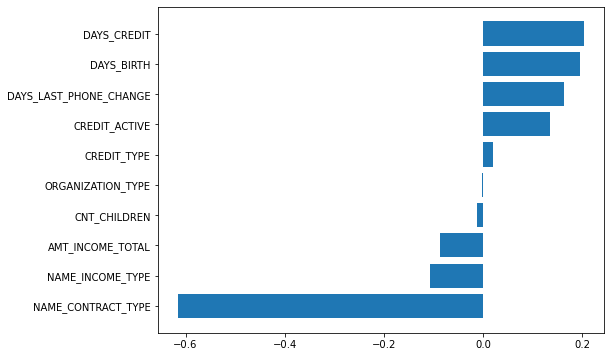

In [80]:
coef=pd.DataFrame(model.coef_[0],columns=["weights"])
colmn=pd.DataFrame(X_train.columns,columns=["columns"])
importances=pd.concat([coef,colmn],axis=1)
importances.sort_values("weights",ascending=True,inplace=True)
print(importances)
plt.figure(figsize=(8,6))
plt.barh(importances["columns"],width=importances["weights"])
plt.show()

# P-value

In [81]:
from scipy import stats

In [82]:
corr_df = pd.DataFrame(columns=["Feature","corr","p_value"])

for col in X.columns:
    if col != "TARGET":
        corr,p_value = stats.pearsonr(df_upsampled["TARGET"],X[col])
        corr_df.loc[len(corr_df)] = [col,corr,p_value]
    
corr_df

,Feature,corr,p_value
0,DAYS_BIRTH,0.143432,0.000000e+00
1,DAYS_LAST_PHONE_CHANGE,0.104188,0.000000e+00
2,DAYS_CREDIT,0.155522,0.000000e+00
3,AMT_INCOME_TOTAL,-0.043214,8.171509e-232
4,NAME_CONTRACT_TYPE,-0.061079,0.000000e+00
5,CNT_CHILDREN,0.035076,2.205503e-153
6,NAME_INCOME_TYPE,-0.107394,0.000000e+00
7,ORGANIZATION_TYPE,0.007069,1.065154e-07
8,CREDIT_ACTIVE,0.119722,0.000000e+00
9,CREDIT_TYPE,0.038562,5.570929e-185


# Variance Inflation Factor(VIF)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif_data = pd.DataFrame()
vif_data["feature"] = i=X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [85]:
vif_data

,feature,VIF
0,DAYS_BIRTH,1.429016
1,DAYS_LAST_PHONE_CHANGE,1.048091
2,DAYS_CREDIT,1.286779
3,AMT_INCOME_TOTAL,1.013474
4,NAME_CONTRACT_TYPE,1.084267
5,CNT_CHILDREN,1.361267
6,NAME_INCOME_TYPE,1.593877
7,ORGANIZATION_TYPE,1.466940
8,CREDIT_ACTIVE,2.081111
9,CREDIT_TYPE,1.324174


# K-S metrics

In [86]:
def Ks(data,target,prob):
    data["target0"] = 1- data[target]
    data['bucket'] = pd.qcut(data[prob], 10,labels = False)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return kstable

In [87]:
ka = Ks(pred_prob,"label","prob")
ka

KS is 20.1% at decile 5


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.656060,0.775465,9681,4454,13.75%,6.28%,13.75%,6.28%,7.5
2,0.610381,0.656058,8957,5177,12.73%,7.30%,26.48%,13.57%,12.9
3,0.572705,0.610377,8430,5699,11.98%,8.03%,38.46%,21.60%,16.9
4,0.537845,0.572704,7852,6287,11.16%,8.86%,49.61%,30.47%,19.1
5,0.503381,0.537840,7387,6746,10.49%,9.51%,60.11%,39.97%,20.1
6,0.468840,0.503380,6845,7290,9.72%,10.27%,69.83%,50.25%,19.6
7,0.433195,0.468825,6251,7881,8.88%,11.11%,78.71%,61.35%,17.4
8,0.393868,0.433185,5820,8316,8.27%,11.72%,86.98%,73.07%,13.9
9,0.341416,0.393865,5045,9089,7.17%,12.81%,94.15%,85.88%,8.3


# X_train_predit

In [88]:
X_train_predit = model.predict(X_train)
X_train_predit

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# X_train Receiver operating characteristic curve

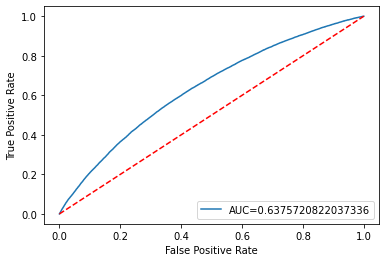

In [89]:
y_train_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred_proba)
Y_train_auc = metrics.roc_auc_score(y_train, y_train_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1], "r--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Train_Gini

In [90]:
gini = 2 *Y_train_auc-1
gini

0.27364152839160516

# Train_Concordance AND Discordance

In [91]:
train_pred_prob = pd.DataFrame({'label':y_train, 'prob':y_train_pred_proba}, columns=['label','prob'])
zeros_prob = train_pred_prob[train_pred_prob['label']==0]
ones_prob = train_pred_prob[train_pred_prob['label']==1]

In [92]:
from bisect import bisect_left, bisect_right

zeros_length = zeros_prob.shape[0]
ones_length = ones_prob.shape[0]

zeros_list = sorted([zeros_prob.iloc[j,1] for j in range(zeros_length)])

disc, ties, conc = 0, 0, 0
for i in range(ones_length):
    cur_disc = bisect_left(zeros_list, ones_prob.iloc[i,1])
    cur_ties = bisect_right(zeros_list, ones_prob.iloc[i,1]) - cur_disc
    disc += cur_disc
    ties += cur_ties
    conc += zeros_length - cur_ties - cur_disc
    
pairs_tested = zeros_length * ones_length

In [93]:
concordance = conc/pairs_tested
discordance = disc/pairs_tested
ties_perc = ties/pairs_tested

print("Concordance = %r", concordance)
print("Discordance = %r", discordance)
print("Tied = %r", ties_perc)
print("Pairs = %r", pairs_tested)

Concordance = %r 0.3631790588481188
Discordance = %r 0.636820587239724
Tied = %r 3.539121571399093e-07
Pairs = %r 44949006919


# Train K-S metrics

In [94]:
def Train_Ks(data,target,prob):
    data["target0"] = 1- data[target]
    data['bucket'] = pd.qcut(data[prob], 10,labels = False)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return kstable

In [95]:
train_ks = Train_Ks(pred_prob,"label","prob")
train_ks

KS is 20.1% at decile 5


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.656060,0.775465,9681,4454,13.75%,6.28%,13.75%,6.28%,7.5
2,0.610381,0.656058,8957,5177,12.73%,7.30%,26.48%,13.57%,12.9
3,0.572705,0.610377,8430,5699,11.98%,8.03%,38.46%,21.60%,16.9
4,0.537845,0.572704,7852,6287,11.16%,8.86%,49.61%,30.47%,19.1
5,0.503381,0.537840,7387,6746,10.49%,9.51%,60.11%,39.97%,20.1
6,0.468840,0.503380,6845,7290,9.72%,10.27%,69.83%,50.25%,19.6
7,0.433195,0.468825,6251,7881,8.88%,11.11%,78.71%,61.35%,17.4
8,0.393868,0.433185,5820,8316,8.27%,11.72%,86.98%,73.07%,13.9
9,0.341416,0.393865,5045,9089,7.17%,12.81%,94.15%,85.88%,8.3


# RandomForestClassifier

In [96]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=5,max_features = 'sqrt')
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.6034724285774928

In [97]:
pred = rf.predict(X_test)

# confusion_matrix

In [98]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
confusion_matrix

array([[42081, 28875],
       [27171, 43215]], dtype=int64)